# How to Forecast a Time Series with Python

Wouldn't it be nice to know the future? This is the notebook that relates to the blog post on medium. Please check the blog for visualizations and explanations, this notebook is really just for the code :)


## Processing the Data

Let's explore the Industrial production of electric and gas utilities in the United States, from the years 1985-2018, with our frequency being Monthly production output.

You can access this data here: https://fred.stlouisfed.org/series/IPG2211A2N

This data measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

In [21]:
%matplotlib inline
import pandas as pd

import matplotlib.pyplot as plt

from plotly.offline import init_notebook_mode, iplot, plot_mpl
from statsmodels.tsa.seasonal import seasonal_decompose


init_notebook_mode(connected=True)

## Read CSV

In [22]:
data = pd.read_csv("data/Electric_Production.csv", index_col=0)
data.head()

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


Right now our index is actually just a list of strings that look like a date, we'll want to adjust these to be timestamps, that way our forecasting analysis will be able to interpret these values:

In [2]:
data.index

Index(['1985-01-01', '1985-02-01', '1985-03-01', '1985-04-01', '1985-05-01',
       '1985-06-01', '1985-07-01', '1985-08-01', '1985-09-01', '1985-10-01',
       ...
       '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
       '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01', '2018-01-01'],
      dtype='object', name='DATE', length=397)

In [3]:
data.index = pd.to_datetime(data.index)

In [4]:
data.head()

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [5]:
data.index

DatetimeIndex(['1985-01-01', '1985-02-01', '1985-03-01', '1985-04-01',
               '1985-05-01', '1985-06-01', '1985-07-01', '1985-08-01',
               '1985-09-01', '1985-10-01',
               ...
               '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01',
               '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01',
               '2017-12-01', '2018-01-01'],
              dtype='datetime64[ns]', name='DATE', length=397, freq=None)

Let's first make sure that the data doesn't have any missing data points:

In [6]:
data[pd.isnull(data['IPG2211A2N'])]

,IPG2211A2N
DATE,


Let's also rename this column since its hard to remember what "IPG2211A2N" code stands for:

In [7]:
data.columns = ['Energy Production']

In [8]:
data.head()

,Energy Production
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


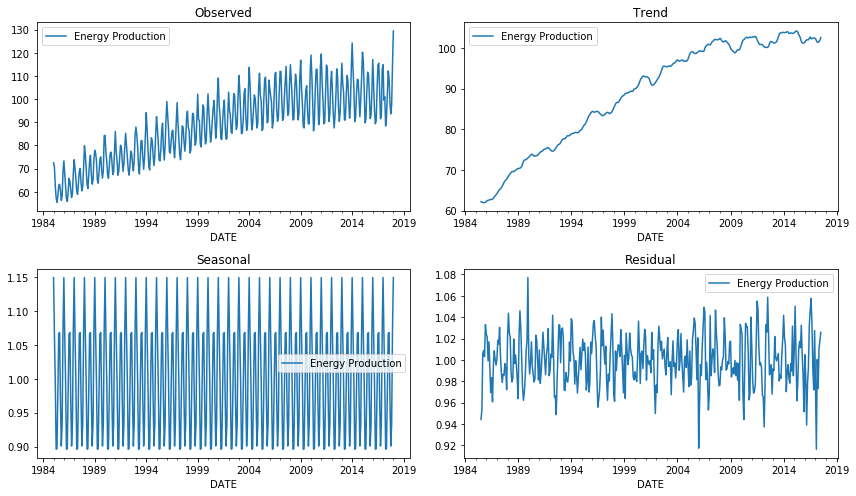

In [20]:
# from plotly.plotly import plot_mpl

y = seasonal_decompose(data, model='multiplicative')

fig     = plt.figure(figsize=(12, 7))
layout  = (2, 2)
obs_ax  = plt.subplot2grid(layout, (0, 0))
ses_ax  = plt.subplot2grid(layout, (0, 1))
tnd_ax  = plt.subplot2grid(layout, (1, 0))
rsd_ax  = plt.subplot2grid(layout, (1, 1))

y.observed.plot(ax=obs_ax, title = 'Observed')
y.trend.plot(ax=ses_ax, title = 'Trend')
y.seasonal.plot(ax=tnd_ax, title = 'Seasonal')
y.resid.plot(ax=rsd_ax, title = 'Residual')

plt.tight_layout()

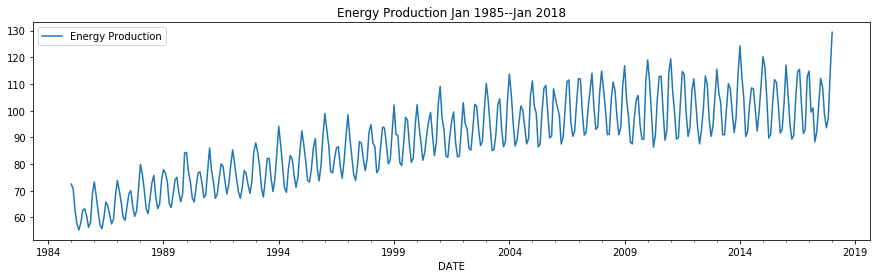

In [15]:
data.plot(title="Energy Production Jan 1985--Jan 2018", figsize=(15,4))

In [10]:
from pyramid.arima import auto_arima

C:\Users\Marcial\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning:

The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.



**he AIC measures how well a model fits the data while taking into account the overall complexity of the model. A model that fits the data very well while using lots of features will be assigned a larger AIC score than a model that uses fewer features to achieve the same goodness-of-fit. Therefore, we are interested in finding the model that yields the lowest AIC value.

In [30]:
stepwise_model = auto_arima(data, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True) 

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1782.527, BIC=1802.447, Fit time=0.866 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=1942.040, BIC=1957.976, Fit time=0.238 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1837.289, BIC=1853.224, Fit time=0.361 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=1783.875, BIC=1807.778, Fit time=1.434 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=1920.884, BIC=1936.820, Fit time=0.451 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=1784.212, BIC=1808.116, Fit time=3.491 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=1781.900, BIC=1809.788, Fit time=3.586 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=1837.164, BIC=1861.067, Fit time=1.287 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_orde

In [31]:
stepwise_model.aic()

1771.2948217037836

## Train Test Split

In [32]:
data.head()

,Energy Production
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 397 entries, 1985-01-01 to 2018-01-01
Data columns (total 1 columns):
Energy Production    397 non-null float64
dtypes: float64(1)
memory usage: 26.2 KB


We'll train on 20 years of data, from the years 1985-2015 and test our forcast on the years after that and compare it to the real data.

In [34]:
train = data.loc['1985-01-01':'2016-12-01']

In [35]:
train.tail()

,Energy Production
DATE,
2016-08-01,115.5159
2016-09-01,102.7637
2016-10-01,91.4867
2016-11-01,92.8900
2016-12-01,112.7694


In [36]:
test = data.loc['2015-01-01':]

In [37]:
test.head()

,Energy Production
DATE,
2015-01-01,120.2696
2015-02-01,116.3788
2015-03-01,104.4706
2015-04-01,89.7461
2015-05-01,91.0930


In [38]:
test.tail()

,Energy Production
DATE,
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359
2017-12-01,114.7212
2018-01-01,129.4048


In [39]:
len(test)

37

In [40]:
stepwise_model.fit(train)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(1, 1, 1),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(2, 1, 1, 12), solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend='c')

In [41]:
future_forecast = stepwise_model.predict(n_periods=37)

In [42]:
future_forecast

array([ 121.0069841 ,  110.05829773,  100.66214128,   90.6704282 ,
         92.16164339,  103.22814008,  112.50690673,  112.11184857,
        101.04339558,   92.07696292,   95.82735302,  111.26301564,
        120.21587944,  111.32815023,  102.16625906,   90.55576703,
         92.13024541,  102.88613935,  111.8729164 ,  111.06722082,
        100.84852305,   92.07136347,   95.82277211,  109.23003471,
        119.35147539,  110.56205836,  100.99051798,   90.20673887,
         91.75667578,  102.973546  ,  112.20965839,  111.68458911,
        101.10323951,   91.83416937,   95.08657978,  109.42245514,
        119.38303158])

In [43]:
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=['Prediction'])

In [44]:
future_forecast.head()

,Prediction
DATE,
2015-01-01,121.006984
2015-02-01,110.058298
2015-03-01,100.662141
2015-04-01,90.670428
2015-05-01,92.161643


In [45]:
test.head()

,Energy Production
DATE,
2015-01-01,120.2696
2015-02-01,116.3788
2015-03-01,104.4706
2015-04-01,89.7461
2015-05-01,91.0930


In [46]:
pd.concat([test,future_forecast],axis=1).iplot()

In [47]:
future_forecast2 = future_forcast

In [48]:
pd.concat([data,future_forecast2],axis=1).iplot()